# Using Python for Research Homework: Week 5, Case Study Part 1

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 1, we will inspect, clean, and transform the data.

### Exercise 1

First, we will import several libraries. `scikit-learn` (**sklearn**) contains helpful statistical models, and we'll use the `matplotlib.pyplot` library for visualizations. Of course, we will use `numpy` and `pandas` for data manipulation throughout.

#### Instructions 

- Read and execute the given code.
- Call `df.head()` to take a look at the data.

In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

df = pd.read_csv("asset-v1_HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

print(df.head())


      budget                                       genres  \
0  237000000  Action, Adventure, Fantasy, Science Fiction   
1  300000000                   Adventure, Fantasy, Action   
2  245000000                     Action, Adventure, Crime   
3  250000000               Action, Crime, Drama, Thriller   
4  260000000           Action, Adventure, Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash, future, space war, space colony...                en   
1  ocean, drug abuse, exotic island, east india t...                en   
2  spy, based on novel, secret agent, sequel, mi6...    

### Exercise 2

In this exercise, we will define the regression and classification outcomes. Specifically, we will use the `revenue` column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

#### Instructions 
- Create a new column in `df` called `profitable`, defined as 1 if the movie `revenue` is greater than the movie `budget`, and 0 otherwise.
- Next, define and store the outcomes we will use for regression and classification.
    - Define `regression_target` as the string `'revenue'`.
    - Define `classification_target` as the string `'profitable'`.

In [17]:
df['profitable'] = np.where(df['revenue']>df['budget'], 1, 0)
regression_target='revenue'
classification_target='profitable'

How many movies in this dataset are defined as profitable (value 1)?

In [18]:
print(df.groupby('profitable')['profitable'].count())

profitable
0    2218
1    2585
Name: profitable, dtype: int64


### Exercise 3

For simplicity, we will proceed by analyzing only the rows without any missing data. In this exercise, we will remove rows with any infinite or missing values.

#### Instructions 

- Use `df.replace()` to replace any cells with type `np.inf` or `-np.inf` with `np.nan`.
- Drop all rows with any `np.nan` values in that row using `df.dropna()`. Do any further arguments need to be specified in this function to remove rows with any such values?

In [23]:
df=df.replace(np.inf,np.nan)
df=df.replace(-np.inf,np.nan)
df=df.dropna(how='any')
df1=df

In [24]:
print(df.shape)

(1406, 23)


### Exercise 4

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Let's add indicator columns for each genre.

#### Instructions 

- Determine all the genres in the genre column. Make sure to use the `strip()` function on each genre to remove trailing characters.
- Next, include each listed genre as a new column in the dataframe. Each element of these genre columns should be 1 if the movie belongs to that particular genre, and 0 otherwise. Keep in mind, a movie may belong to several genres at once.
- Call `df[genres].head()` to view your results.

In [32]:
genres_list=df.genres.unique()
genres_final=[]
for genres in genres_list:
    genres=genres.split(",")
    for genre in genres:
        genre=genre.strip()
        if genre not in genres_final:
            genres_final.append(genre)
print(genres_final)
print(len(genres_final))

['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']
20


In [28]:
for genre in genres_final:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in [s.strip() for s in x.split(",")] else 0)


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 4796
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1406 non-null   int64  
 1   genres                1406 non-null   object 
 2   homepage              1406 non-null   object 
 3   id                    1406 non-null   int64  
 4   keywords              1406 non-null   object 
 5   original_language     1406 non-null   object 
 6   original_title        1406 non-null   object 
 7   overview              1406 non-null   object 
 8   popularity            1406 non-null   float64
 9   production_companies  1406 non-null   object 
 10  production_countries  1406 non-null   object 
 11  release_date          1406 non-null   object 
 12  revenue               1406 non-null   int64  
 13  runtime               1406 non-null   float64
 14  spoken_languages      1406 non-null   object 
 15  status               

### Exercise 5

Some variables in the dataset are already numeric and perhaps useful for regression and classification. In this exercise, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

#### Instructions 
- Call `plt.show()` to observe the plot below.
    - Which of the covariates and/or outcomes are correlated with each other?
- Call `skew()` on the columns `outcomes_and_continuous_covariates` in df.
    - Is the skew above 1 for any of these variables?

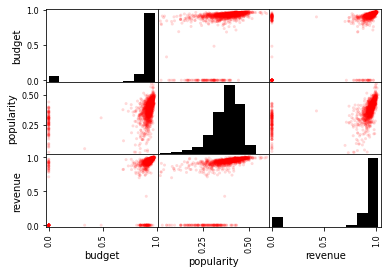

budget         -3.205872
popularity     -1.166747
runtime         0.461748
vote_count     -1.667956
vote_average   -1.080038
revenue        -2.499342
profitable     -1.081030
dtype: float64

In [45]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.15, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(1,0,0))
plt.savefig("Normal skew.pdf")
plt.show()
df[outcomes_and_continuous_covariates].skew()

# determine the skew.

### Exercise 6

It appears that the variables `budget`, `popularity`, `runtime`, `vote_count`, and `revenue` are all right-skewed. In this exercise, we will transform these variables to eliminate this skewness. Specifically, we will use the `np.log10()` method. Because some of these variable values are exactly 0, we will add a small positive value to each to ensure it is defined; this is necessary because log(0) is negative infinity.

#### Instructions 
- For each above-mentioned variable in `df`, transform value `x` into `np.log10(1+x)`.

In [41]:
right_skewed = ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']
for column in right_skewed:
    df[column] = df[column].apply(lambda x:np.log10(1+x))

What is the new value of skew() for the covariate runtime? Please provide the answer to 3 decimal points.

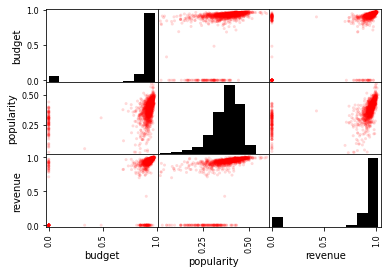

budget         -3.205872
popularity     -1.166747
runtime         0.461748
vote_count     -1.667956
vote_average   -1.080038
revenue        -2.499342
profitable     -1.081030
dtype: float64

In [46]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.15, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(1,0,0))
plt.savefig("transformed skew.pdf")
plt.show()
df[outcomes_and_continuous_covariates].skew()

# determine the skew.

### Exercise 7

Let's now save our dataset. 

#### Instructions 
- Use `to_csv()` to save the `df` object as `movies_clean.csv`.

In [38]:
df.to_csv("movies_clean.csv")
